# Multinomial with Dirichlet Prior

## Understanding the Multinomial Distribution
The multinomial distribution is a higher-dimensional generalization of the binomial distribution. If one thinks of the binomial distribution as modeling the outcome probability of a coin (with two sides: heads and tails) flipped n times, the multinomial distribution extends this notion, modeling the outcome probability of a $k$-sided die rolled $n$ times.

While each side of a fair $k$-sided die would be expected to have a probability of $\frac{1}{k}$, the multinomial distribution does not restrict the die to being fair, instead allow each individual possible category to have its own probability, provided that the category probabilities are non-negative and the total probability sums to 1. More formally, let there be a set $\mathbb{K}=\{K_1,...,K_k\}$ representing all possible categories (or sides of the die), where $k=|\mathbb{K}|$. There then is a set $\mathbb{P}=\{p_1,...,p_k\}$ which represents the set of probabilities corresponding to each category $K_i\in\mathbb{K}$.

|Parameters of the Multinomial Distribution|Interpretation|
|:-:|:-:|
|$k\in\mathbb{N}$|number of categories|
|$\mathbb{K}=\{K_1,...,K_k\}$|set of categories|
|$\mathbb{P}=\{p_1,...,p_k\}$ where $0\le p_i \le 1$ and $\sum\mathbb{P}=1$|set of category probabilities|
|$n\in\mathbb{N}$|number of trials|

The probability mass function (PMF) of the multinomial distribution takes the following form:

$$Multinomial(x|n,\mathbb{P})=\frac{\Gamma\left(\sum_{i=1}^{k}x_i+1\right)}{\prod_{i=1}^{k}\Gamma(x_i+1)}\prod_{i=1}^{k}p_i^{x_i}$$

Let us begin exploring this distribution by graphing the distribution of the expected value of 10 tosses of a fair 6-sided die.

Thus, we have the following parameterization.
$$k=6, n=10$$
$$\mathbb{K}=\{1,2,3,4,5,6\}$$
$$\mathbb{P}=\{\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6}\}$$

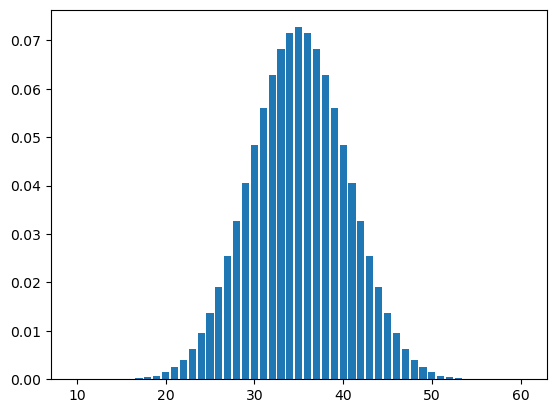

In [101]:
from scipy.stats import multinomial
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

n = 10
K = [1,2,3,4,5,6]
k = len(K)
P = k*[1/k]

k_values = range(n*min(K),n*max(K)+1)
combos = [combo for combo in product(range(0,(n+1)),repeat=k) if sum(combo) == n]
dist = []
for i in k_values:
    filtered = [combo for combo in combos if np.dot(combo,K) == i]
    dist.append(sum(multinomial.pmf(filtered,n,P)))

plt.bar(k_values,dist)
plt.show()

## Proving the Conjugacy of the Multinomial and Dirichlet Distribution

If we take the multinomial distribution to be our likelihood function $p(x|n,\mathbb{P})$, we would ideally like a prior distribution $p(\mathbb{P})$ that is conjugate to the multinomial distribution such that we can analytically derive both the posterior distribution $p(\mathbb{P}|\mathbb{X})$ and posterior predictive distribution $p(\tilde{x}|\mathbb{X})$. 

As luck would have it, the PMF of the multinomial shows resemblance to the Dirichlet distribution, which we may use as its conjugate prior.

The Dirichlet distribution probability density function takes the following form:

$$Dirichlet(\mathbb{P}|\boldsymbol{\alpha})=\frac{\Gamma\left(\sum_{i=1}^{k}\alpha_i\right)}{\prod_{i=1}^{k}\Gamma(\alpha_i)}\prod_{i=1}^{k}p_i^{\alpha_i-1}$$

with hyperparameter $\boldsymbol{\alpha}=\{\alpha_1,\dots,\alpha_k\}$, $\alpha_i\in\mathbb{N}$ representing the set of prior pseudocounts corresponding to each of the $k$ categories.

Using Bayes' theorem and the knowledge that both distributions are already normalized, we can derive the form of the posterior distribution:

$$\begin{align}
p(\mathbb{P}|\mathbb{X},\boldsymbol{\alpha}) & = p(\mathbb{x}|\mathbb{P})p(\mathbb{P}|\boldsymbol{\alpha}) \\
& = Multinomial(\mathbb{x}|\mathbb{P})\cdot Dirichlet(\mathbb{P}|\boldsymbol{\alpha}) \\
& = \frac{\Gamma\left(\sum_{i=1}^{k}x_i+1\right)}{\prod_{i=1}^{k}\Gamma(x_i+1)}\prod_{i=1}^{k}p_i^{x_i}\frac{\Gamma\left(\sum_{i=1}^{k}\alpha_i\right)}{\prod_{i=1}^{k}\Gamma(\alpha_i)}\prod_{i=1}^{k}p_i^{\alpha_i-1} \\
& = \frac{\Gamma\left(\sum_{i=1}^{k}\alpha_i+x_i+1\right)}{\prod_{i=1}^{k}\Gamma(\alpha_i+x_i+1)}\prod_{i=1}^{k}p_i^{\alpha_i+x_i-1} \\
& = Dirichlet(\mathbb{P}|\boldsymbol{\alpha}') \\
\end{align}$$

with $\boldsymbol{\alpha}'=f(\boldsymbol{\alpha})$ where $f:\boldsymbol{\alpha}\mapsto\boldsymbol{\alpha}'$ such that $\forall i\in\{1,\dots,k\}, \boldsymbol{\alpha}'_i=\boldsymbol{\alpha}_i+x_i$, indicating that the hyperparameter of the posterior distribution can be analytically derived by the addition of observed counts of each category to the corresponding category pseudocount of the prior hyperparameter vector $\boldsymbol{\alpha}$.

## Deriving the PPD

Finally we can leverage the posterior distribution towards calculating the posterior predictive distribution.

$$\begin{align}
PPD & = p(\tilde{\mathbb{x}}|\mathbb{X})=\int_{\mathbb{P}}p(\tilde{\mathbb{x}}|\mathbb{P})\,\cdotp(\mathbb{P}|\mathbb{X},\boldsymbol{\alpha'})d\mathbb{P} \\
& = \int_{\mathbb{P}}Multinomial(\tilde{\mathbb{x}}|\mathbb{P})\cdot Dirichlet(\mathbb{P}|\mathbb{X},\boldsymbol{\alpha'})d\mathbb{P} \\
& = DirMult(\tilde{\mathbb{x}}|\mathbb{X},\boldsymbol{\alpha'}) \\
\end{align}$$

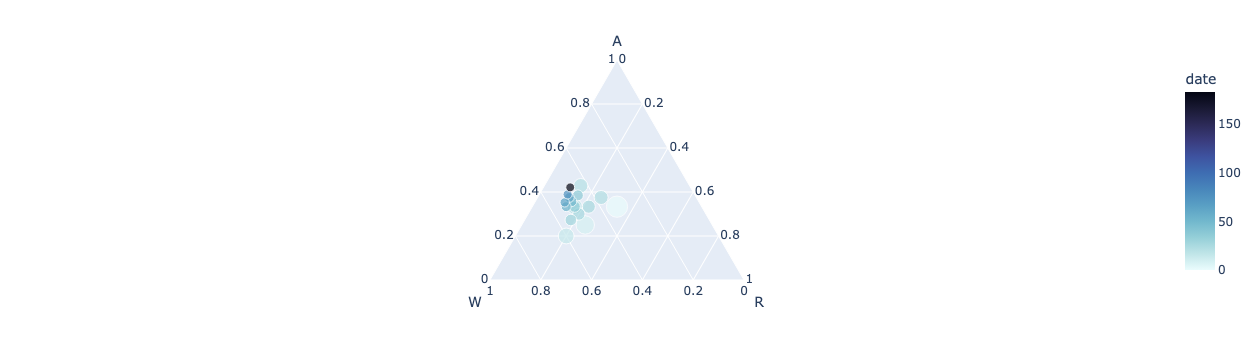

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import dirichlet
import plotly.express as px
import datetime

interviews = [
(np.datetime64("2022-09-09"),"W"), # wvu - 9/9 waitlist
(np.datetime64("2022-09-15"),"W"), # etsu - 9/15 waitlist
(np.datetime64("2022-09-20"),"A"), # SLU - 9/20 acceptance
(np.datetime64("2022-09-21"),"A"), # geisinger - 9/21 acceptance
(np.datetime64("2022-09-23"),"R"), # cin - 9/23 rejection
(np.datetime64("2022-09-27"),"W"), # temple - 9/27 waitlist
(np.datetime64("2022-09-28"),"W"), # evms - 9/28 waitlist
(np.datetime64("2022-09-30"),"W"), # einstein - 9/30 waitlist
(np.datetime64("2022-10-06"),"A"), # michigan - 10/6 acceptance
(np.datetime64("2022-10-07"),"A"), # drexel - 10/7 acceptance
(np.datetime64("2022-10-21"),"W"), # vandy - 10/21 waitlist
(np.datetime64("2022-10-24"),"W"), # wake - 10/24 waitlist
(np.datetime64("2022-11-01"),"A"), # nymc - 11/1 acceptance
(np.datetime64("2022-11-03"),"W"), # cornell - 11/3 waitlist
(np.datetime64("2022-11-15"),"A"), # ut - 11/15 acceptance
(np.datetime64("2023-03-03"),"A"), # quin - 3/3 acceptance
]

result_dict = {
"A": 0,
"W": 0,
"R": 0
}

def scale_date(date):
    return int((date-np.datetime64("2022-09-01"))/np.timedelta64(1,'D'))

alpha_evolution = [[1,1,1]]
dates = [0]
means = []
var = []

for (d,i) in interviews:
    dates.append(scale_date(d))
    result_dict[i] += 1
    alpha_evolution.append([result_dict["A"]+1,result_dict["W"]+1,result_dict["R"]+1])
    
for alpha in alpha_evolution:
    a = np.array(alpha)
    means.append(dirichlet.mean(a))
    var.append(sum(dirichlet.var(a)))
    
df = pd.DataFrame(means,columns=['A','W','R'])
df['σ²'] = var
df['date'] = dates
fig = px.scatter_ternary(df,a="A",b="W",c="R",size="σ²",size_max=15,color='date',color_continuous_scale="ice_r")
fig.show()
# ice, algae, pubu

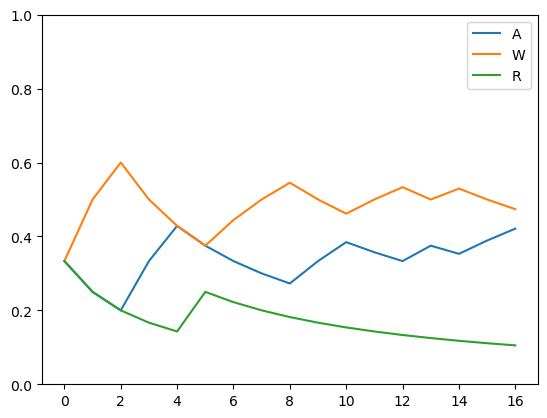

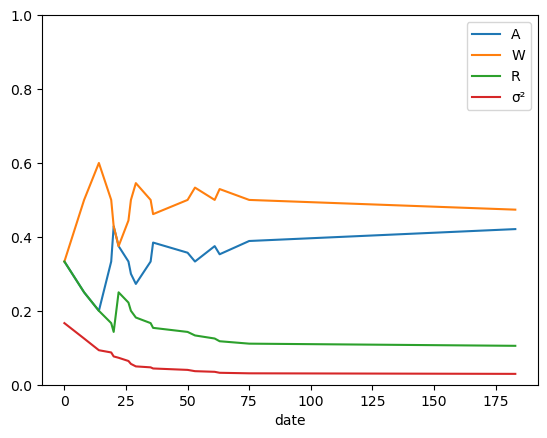

In [198]:
_ = df.plot.line(y=["A","W","R"],ylim=(0,1))
_ = df.plot.line(x="date",ylim=(0,1))

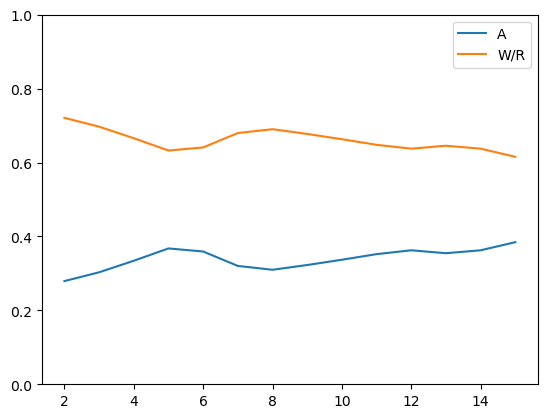

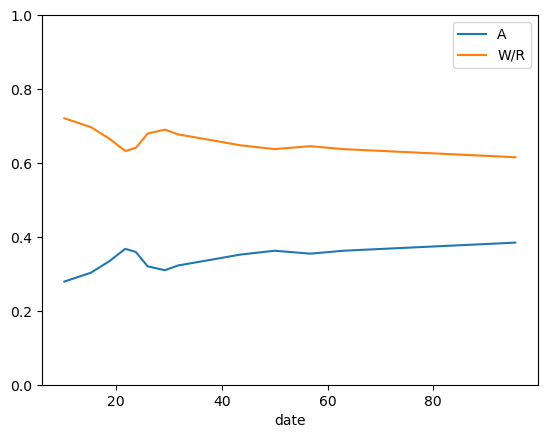

In [199]:
df2 = pd.DataFrame(df["A"],columns=["A","W/R"])
df2["W/R"] = df["W"]+df["R"]
df2["date"] = df["date"]
_ = df2.rolling(window=4,min_periods=4,center=True).mean().plot.line(y=["A","W/R"],ylim=(0,1))
_ = df2.rolling(window=4,min_periods=4,center=True).mean().plot.line(x="date",ylim=(0,1))